In [4]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(42) 

In [16]:
x_inf = 1
x_0 = 0
a = 0.5
b = 0.5

def simulate_ou(T, size, dt, x_0, x_inf, a, b):
    n_intervals = int(T/dt)
    x= np.zeros((size, n_intervals))
    x[:,0] = x_0
    for i in range(1, n_intervals):
        t = i*dt
        dw = np.random.normal(0, np.sqrt(dt), size)
        x[:,i] = x[:,i-1] - a* np.exp(-a*t)*(x_0-x_inf)*dt + b * dw
    return x

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process')

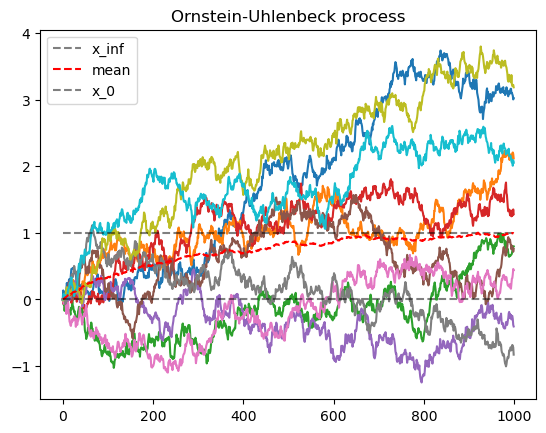

In [48]:
T = 10
size = 100
dt = 0.01
x = simulate_ou(T, size, dt, x_0, x_inf, a, b)

plt.plot(x.T[:,:10])
# plot the line x_inf
plt.plot(np.ones(x.shape[1])*x_inf, 'k--', alpha=0.5, label='x_inf')
# plot the mean of the process
plt.plot(np.mean(x, axis=0), 'r--', label='mean')
# plot x_0
plt.plot(np.ones(x.shape[1])*x_0, 'k--', alpha=0.5, label='x_0')
plt.legend()
plt.title('Ornstein-Uhlenbeck process')

50


Text(0.5, 1.0, 'Covariance between x_t and x_tau')

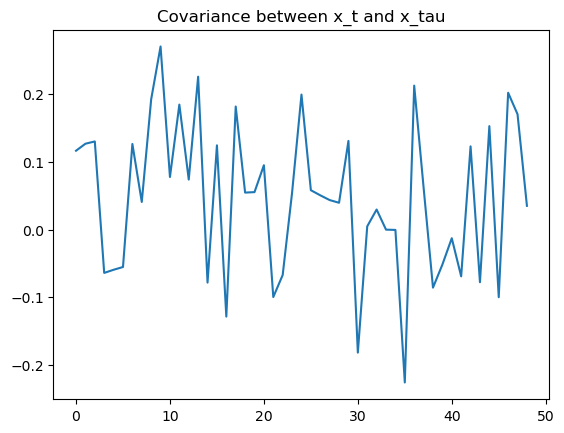

In [49]:
T_size = x.shape[0]
t = T_size//2

x_t = x[t, :]
covariance = []
for i in range(t+1, T_size):
    x_tau = x[i, :]
    covariance.append(np.cov(x_t, x_tau)[0,1])
    
plt.plot(covariance, label='Covariance')
plt.title('Covariance between x_t and x_tau')